# Rutas y librerías

In [1]:
import pandas as pd
import numpy as np
import os

In [4]:
# Se debe definir la ruta donde se encuentren los ficheros CSV del Dataset. Dataset utilizado: CIC_DDoS2019
# rutaCSV = "/rutaEjemplo/"

# Preprocesado del Dataset

### Funciones de carga y optimización

In [5]:
def optimizar_tipos_datos(df):
    df = df.apply(lambda x: x.astype("float32") if np.issubdtype(x.dtype, np.floating) else x)
    df = df.apply(lambda x: x.astype("int32") if np.issubdtype(x.dtype, np.integer) else x)
    return df

In [6]:
def preprocesar_df(df):
    start_mem_usg = df.memory_usage().sum() / 1024**2
    print("Memoria usada por el df (sin optimizar): ", start_mem_usg, " MB")

    df.dropna(inplace=True)
    df.drop_duplicates(inplace=True)

    df = optimizar_tipos_datos(df)

    final_mem_usg = df.memory_usage().sum() / 1024**2
    print("Memoria usada por el df (optimizado): ",final_mem_usg," MB")
    return df

In [7]:
def cargar_csv(ruta_csv):
     df = pd.read_csv(ruta_csv, usecols=lambda column: column in columnas_a_mantener)
     return preprocesar_df(df)

### Preprocesado de todos los csv

In [8]:
columnas_a_mantener = [
    ' Protocol', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 
    'Total Length of Fwd Packets', ' Total Length of Bwd Packets', 
    ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', 
    'Bwd Packet Length Max', ' Bwd Packet Length Min', 
    ' Bwd Packet Length Mean', 'Flow Bytes/s', 
    ' Flow Packets/s', ' Average Packet Size', 
    'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', 
    ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count',
    ' CWE Flag Count', ' ECE Flag Count', ' Label'
]

lista_df = []

for file in os.listdir(rutaCSV):
    if file.endswith('.csv'):
        df = cargar_csv(rutaCSV + "/" + file)
        num_filas = df.shape[0]
        print("Número de filas: ", num_filas)

        basename = file.split('.')[0]
        lista_df.append(df)
        
        print(file, ':\n', df[' Label'].value_counts())

Memoria usada por el df (sin optimizar):  386.94482803344727  MB
Memoria usada por el df (optimizado):  0.7516708374023438  MB
Número de filas:  7298
LDAP.csv :
  Label
BENIGN     3964
LDAP       2746
NetBIOS     588
Name: count, dtype: int64
Memoria usada por el df (sin optimizar):  1057.5781288146973  MB
Memoria usada por el df (optimizado):  2.465435028076172  MB
Número de filas:  23937
MSSQL.csv :
  Label
MSSQL     21456
BENIGN     2261
LDAP        220
Name: count, dtype: int64
Memoria usada por el df (sin optimizar):  632.794132232666  MB
Memoria usada por el df (optimizado):  0.7686653137207031  MB
Número de filas:  7463
NetBIOS.csv :
  Label
NetBIOS    6307
BENIGN     1156
Name: count, dtype: int64
Memoria usada por el df (sin optimizar):  35.100345611572266  MB
Memoria usada por el df (optimizado):  0.5039634704589844  MB
Número de filas:  4893
Portmap.csv :
  Label
BENIGN     3908
Portmap     985
Name: count, dtype: int64
Memoria usada por el df (sin optimizar):  791.114810943

In [9]:
df

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,...,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Average Packet Size,Label
0,17,47,2,0,778.0,0.0,389.0,389.0,389.000000,0.0,...,0,0,0,0,0,0,0,0,583.5,UDP
1,17,2,2,0,786.0,0.0,393.0,393.0,393.000000,0.0,...,0,0,0,0,0,0,0,0,589.5,UDP
2,17,2,2,0,748.0,0.0,374.0,374.0,374.000000,0.0,...,0,0,0,0,0,0,0,0,561.0,UDP
4,17,880701,18,0,6600.0,0.0,401.0,330.0,366.666656,0.0,...,0,0,0,0,0,0,0,0,385.0,UDP
5,17,107568,4,0,1398.0,0.0,369.0,330.0,349.500000,0.0,...,0,0,0,0,0,0,0,0,432.0,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717275,6,113846,4,0,24.0,0.0,6.0,6.0,6.000000,0.0,...,0,0,0,0,1,0,0,0,7.5,Syn
717871,6,351345,4,0,24.0,0.0,6.0,6.0,6.000000,0.0,...,0,0,0,0,1,0,0,0,7.5,Syn
718954,6,320376,4,0,24.0,0.0,6.0,6.0,6.000000,0.0,...,0,0,0,0,1,0,0,0,7.5,Syn
720587,6,413306,4,0,24.0,0.0,6.0,6.0,6.000000,0.0,...,0,0,0,0,1,0,0,0,7.5,Syn


### Combinación en df y balance

In [10]:

df = pd.concat(lista_df)

df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.dropna(inplace=True)

df

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,...,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Average Packet Size,Label
0,17,1,2,0,422.0,0.0,211.0,211.0,211.0,0.0,...,0,0,0,0,0,0,0,0,316.5,NetBIOS
1,17,48,2,0,530.0,0.0,265.0,265.0,265.0,0.0,...,0,0,0,0,0,0,0,0,397.5,NetBIOS
2,17,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,...,0,0,0,0,0,0,0,0,343.5,NetBIOS
6,17,1,2,0,494.0,0.0,247.0,247.0,247.0,0.0,...,0,0,0,0,0,0,0,0,370.5,NetBIOS
12,17,2,2,0,494.0,0.0,247.0,247.0,247.0,0.0,...,0,0,0,0,0,0,0,0,370.5,NetBIOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717275,6,113846,4,0,24.0,0.0,6.0,6.0,6.0,0.0,...,0,0,0,0,1,0,0,0,7.5,Syn
717871,6,351345,4,0,24.0,0.0,6.0,6.0,6.0,0.0,...,0,0,0,0,1,0,0,0,7.5,Syn
718954,6,320376,4,0,24.0,0.0,6.0,6.0,6.0,0.0,...,0,0,0,0,1,0,0,0,7.5,Syn
720587,6,413306,4,0,24.0,0.0,6.0,6.0,6.0,0.0,...,0,0,0,0,1,0,0,0,7.5,Syn


In [11]:
df.keys()

Index([' Protocol', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', 'Flow Bytes/s', ' Flow Packets/s',
       'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count',
       ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count',
       ' CWE Flag Count', ' ECE Flag Count', ' Average Packet Size', ' Label'],
      dtype='object')

In [12]:
df[' Label'].value_counts()

 Label
Syn        505520
UDP        193301
BENIGN      39657
MSSQL       22997
NetBIOS      6844
LDAP         2897
Portmap       971
UDPLag        307
Name: count, dtype: int64

In [13]:
%env HV_DOC_HTML=true

env: HV_DOC_HTML=true


In [14]:
import holoviews as hv
import hvplot.pandas
hv.extension('bokeh')

In [15]:
df[' Label'].value_counts().hvplot.bar(height=400, width=600, grid=True)

:Bars   [ Label]   (count)

In [16]:
def borrar_filas_por_clase(df, clase, cantidad):
    return df.groupby(' Label', group_keys=False).apply(lambda group: group.sample(n=min(cantidad, len(group))))

In [17]:
df = borrar_filas_por_clase(df, 'MSSQL', 22997)
df = borrar_filas_por_clase(df, 'UDP', 22997)
df = borrar_filas_por_clase(df, 'Syn', 22997)

df = df[(df[' Label'] != 'NetBIOS') & (df[' Label'] != 'Portmap') & (df[' Label'] != 'UDPLag')]

C:\Users\acost\AppData\Local\Temp\ipykernel_15572\1777318441.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(' Label', group_keys=False).apply(lambda group: group.sample(n=min(cantidad, len(group))))
C:\Users\acost\AppData\Local\Temp\ipykernel_15572\1777318441.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(' Label', group_keys=False).apply(lambda group: group.sam

In [18]:
df[' Label'].value_counts().hvplot.bar(height=400, width=600, grid=True)

:Bars   [ Label]   (count)

# Entrenamiento de la IA

### Rutas y librerías

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers, Model, metrics
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

import joblib

### Entrenamiento de la red neuronal

In [20]:
pd.set_option('display.max_columns', None)

df.drop(columns=[' Label']).head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Flow Bytes/s,Flow Packets/s,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Average Packet Size
486978,17,20949,2,2,66.0,98.0,33.0,33.0,33.000000,49.0,49.0,49.0,7828.536133,190.939896,0,0,0,0,0,0,0,0,49.25
784735,17,58850,2,2,88.0,144.0,44.0,44.0,44.000000,72.0,72.0,72.0,3942.226074,67.969414,0,0,0,0,0,0,0,0,69.00
3426721,17,20844,2,2,78.0,276.0,39.0,39.0,39.000000,138.0,138.0,138.0,16983.304688,191.901749,0,0,0,0,0,0,0,0,98.25
496981,6,393,5,0,154.0,0.0,46.0,0.0,30.799999,0.0,0.0,0.0,391857.500000,12722.646484,0,0,1,0,0,1,0,0,40.00
485441,17,20848,2,2,56.0,184.0,28.0,28.0,28.000000,92.0,92.0,92.0,11511.895508,191.864929,0,0,0,0,0,0,0,0,67.00


In [21]:
# Se divide el conjunto de datos en características (X) y etiquetas (y)
X = df.drop(columns=[' Label']).values
y = df[' Label'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Etiquetas en formato one-hot
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y) 

# Se divide el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

joblib.dump(scaler, 'scaler.gz')
joblib.dump(label_encoder, 'encoder.gz')

# Arquitectura de red neuronal
N_FEATURES = X_train.shape[1]
N_CLASSES = len(label_encoder.classes_)

input_layer = layers.Input(shape=(N_FEATURES,))
x = layers.Dense(64, activation='relu')(input_layer)
x = layers.Dense(64, activation='relu')(x)
output_layer = layers.Dense(N_CLASSES, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

learning_rate = 5e-4
training_metrics = [
    metrics.Precision(name='Precision'),
    metrics.Recall(name='Recall'),
    metrics.AUC(name='AUC'),
    metrics.F1Score(name='f1_score', average='macro')
]

model.compile(
    optimizer=Adam(learning_rate),
    loss=CategoricalCrossentropy(),
    metrics=training_metrics
)

# Fase de entrenamiento
history = model.fit(X_train, y_train, epochs=16, batch_size=32, validation_data=(X_test, y_test))

# Fase de evaluación
loss, precision, recall, auc, f1_score = model.evaluate(X_test, y_test)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", precision)
print("Recall en el conjunto de prueba:", recall)
print("AUC en el conjunto de prueba:", auc)
print("F1 score en el conjunto de prueba:", f1_score)

model.save('modelo.keras')


Epoch 1/16
2373/2373 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.9794 - Precision: 0.9271 - Recall: 0.8033 - f1_score: 0.8423 - loss: 0.3692 - val_AUC: 0.9967 - val_Precision: 0.9468 - val_Recall: 0.9415 - val_f1_score: 0.9096 - val_loss: 0.1398
Epoch 2/16
2373/2373 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - AUC: 0.9967 - Precision: 0.9560 - Recall: 0.9533 - f1_score: 0.9194 - loss: 0.1318 - val_AUC: 0.9972 - val_Precision: 0.9637 - val_Recall: 0.9603 - val_f1_score: 0.9230 - val_loss: 0.1195
Epoch 3/16
2373/2373 ━━━━━━━━━━━━━━━━━━━━ 2s 905us/step - AUC: 0.9972 - Precision: 0.9649 - Recall: 0.9628 - f1_score: 0.9310 - loss: 0.1141 - val_AUC: 0.9975 - val_Precision: 0.9642 - val_Recall: 0.9634 - val_f1_score: 0.9247 - val_loss: 0.1070
Epoch 4/16
2373/2373 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - AUC: 0.9977 - Precision: 0.9676 - Recall: 0.9647 - f1_score: 0.9340 - loss: 0.1031 - val_AUC: 0.9978 - val_Precision: 0.9634 - val_Recall: 0.9620 - val_f1_score: 0.9267 - val_loss: 0.1032
Epoch 5/16
2373/23

In [22]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df[' Label'].values)
orden_etiquetas = label_encoder.classes_
print(orden_etiquetas)

['BENIGN' 'LDAP' 'MSSQL' 'Syn' 'UDP']


## Diagramas

594/594 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step


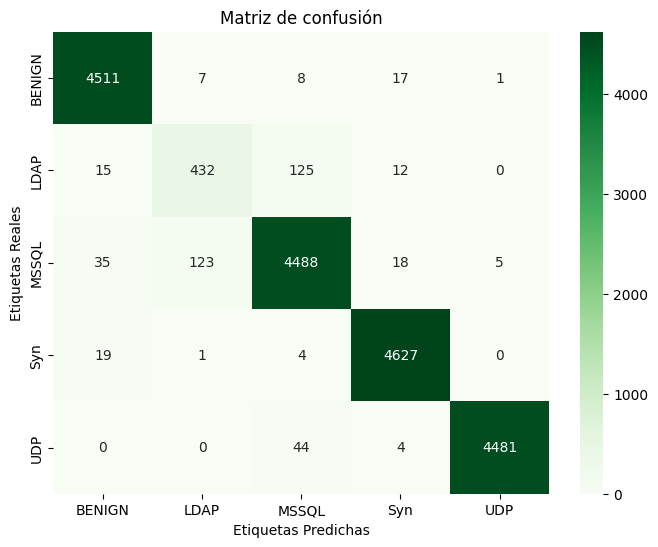

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(model.predict(X_test), axis=-1)

y_true = np.argmax(y_test, axis=-1)

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de confusión')
plt.show()


In [24]:
# Precisión
precision_per_class = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)

# Recall
recall_per_class = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

# F1-Score
f1_score_per_class = 2 * (precision_per_class * recall_per_class) / (precision_per_class + recall_per_class)

for i, label in enumerate(label_encoder.classes_):
    print(f'Precisión para la clase {label}: {precision_per_class[i]}')
    print(f'Recall para la clase {label}: {recall_per_class[i]}')
    print(f'F1-score para la clase {label}: {f1_score_per_class[i]}')


Precisión para la clase BENIGN: 0.9849344978165939
Recall para la clase BENIGN: 0.992737676056338
F1-score para la clase BENIGN: 0.9888206926786497
Precisión para la clase LDAP: 0.7673179396092362
Recall para la clase LDAP: 0.7397260273972602
F1-score para la clase LDAP: 0.7532693984306886
Precisión para la clase MSSQL: 0.9612336688798457
Recall para la clase MSSQL: 0.9612336688798457
F1-score para la clase MSSQL: 0.9612336688798457
Precisión para la clase Syn: 0.9890979050876443
Recall para la clase Syn: 0.9948398193936788
F1-score para la clase Syn: 0.9919605531139458
Precisión para la clase UDP: 0.9986628036550034
Recall para la clase UDP: 0.9894016339147714
F1-score para la clase UDP: 0.9940106477373558


594/594 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step


<Figure size 1000x600 with 0 Axes>

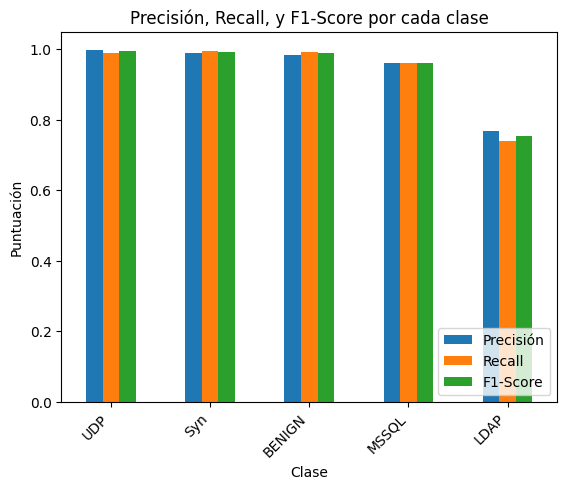

In [32]:
# Gráfico de barras

conf_matrix = confusion_matrix(y_true, y_pred)

metrics_df = pd.DataFrame({'Clase': label_encoder.classes_,
                           'Precisión': precision_per_class,
                           'Recall': recall_per_class,
                           'F1-Score': f1_score_per_class})

metrics_df = metrics_df.sort_values(by='F1-Score', ascending=False)

plt.figure(figsize=(10, 6))
metrics_df.plot(x='Clase', y=['Precisión', 'Recall', 'F1-Score'], kind='bar')
plt.title('Precisión, Recall, y F1-Score por cada clase')
plt.xlabel('Clase')
plt.ylabel('Puntuación')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.show()


